In [3]:
import numpy as np
import numpy.random
import scipy as sp
import scipy.linalg as la
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

# El polinomio interpolador

Buscamos un polinomio
$$
p(x) = a_0 + a_1\cdot x + \dots + a_n\cdot x^n
$$
que pase por los $n+1$ puntos de interpolación
$$
p(x_0)=y_0,\:p(x_1)=y_1,\dots,p(x_n)=y_n.
$$
Sabemos que si los puntos $x_0,\dots,x_n$ son todos distintos, hay un único polinomio que cumpla esas $n+1$ condiciones.

## Forma de Lagrange

El polinomio que cumple estas condiciones se puede expresar como combinación lineal de los polinomios de Lagrange
$$
L(x):=\sum _{j=0}^{k}y_{j}\ell _{j}(x)
$$
donde $\ell _{j}$ son los polinomios de la _base de Lagrange_:
$$
\ell _{j}(x):=\prod _{\begin{smallmatrix}0\leq m\leq k\\m\neq j\end{smallmatrix}}{\frac {x-x_{m}}{x_{j}-x_{m}}}={\frac {(x-x_{0})}{(x_{j}-x_{0})}}\cdots {\frac {(x-x_{j-1})}{(x_{j}-x_{j-1})}}{\frac {(x-x_{j+1})}{(x_{j}-x_{j+1})}}\cdots {\frac {(x-x_{k})}{(x_{j}-x_{k})}}
$$

In [4]:
def lagrange(xs, ys, x_eval):
    '''Polinomio k-esimo de la base de Lagrange
    
    INPUTS:
        - `xs` coordenada x de los puntos de interpolación
        - `ys` coordenada y de los puntos de interpolación
        - `x_eval` es una coordenada, o un array de coordenadas x
          donde evaluar el polinomio
    
    OUTPUTS
        - `y_eval` array resultado de evaluar el polinomio interpolador
        en x_eval
    '''
    n = len(xs)
    y_eval = np.zeros_like(x_eval)
    for i in range(n):
        xi = xs[i]
        yi = ys[i]
        base = np.ones_like(x_eval)
        for j in range(n):
            if j!=i:
                xj = xs[j]
                base = base*(x_eval - xj)/(xi - xj)
        y_eval = y_eval + base*yi
    return y_eval

In [5]:
xs = range(11)
n  = len(xs)
# ys es todo ceros, salvo el índice 3
ys = np.zeros(n)
ys[1] = 1
for k in xs:
    print('x=', k, ', P(x)=', lagrange(xs, ys, k))

x= 0 , P(x)= 0.0
x= 1 , P(x)= 1.0
x= 2 , P(x)= 0.0
x= 3 , P(x)= 0.0
x= 4 , P(x)= 0.0
x= 5 , P(x)= 0.0
x= 6 , P(x)= 0.0
x= 7 , P(x)= 0.0
x= 8 , P(x)= 0.0
x= 9 , P(x)= 0.0
x= 10 , P(x)= 0.0


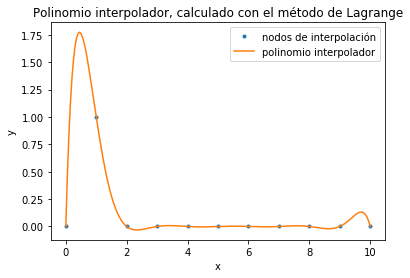

In [6]:
# Ahora evaluamos en un array de puntos, para dibujar el polinomio interpolador
x_eval = np.linspace(0,10,200)
y_eval = lagrange(xs, ys, x_eval)
plt.plot(xs, ys, '.', label='nodos de interpolación')
plt.plot(x_eval, y_eval, label='polinomio interpolador')
plt.title('Polinomio interpolador, calculado con el método de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Ejercicio

- Dibuja todos los polinomios de la base de Lagrange para 10 puntos equiespaciados
- Interpola la función $f(x)=\sin(x)$ en el intervalo $[0,2\pi]$ usando $N=6$ puntos de interpolación. Calcula el máximo error cometido.
- Interpola la función $f(x)=x**5 + x$ en el intervalo $[-1, 1]$ usando $N=4$ puntos de interpolación. Calcula el máximo error cometido.
- Interpola la función $f(x)=x**5 + x$ en el intervalo $[-1, 1]$ usando $N=6$ puntos de interpolación. Calcula el máximo error cometido. Interpreta el resultado.

## Fenómeno de Runge

Algunas funciones no se aproximan bien mediante el polinomio interpolador con nodos equiespaciado. Un ejemplo habitual es la función de Runge:

$$
f(x) = \frac{1}{1 + 25x^2}
$$

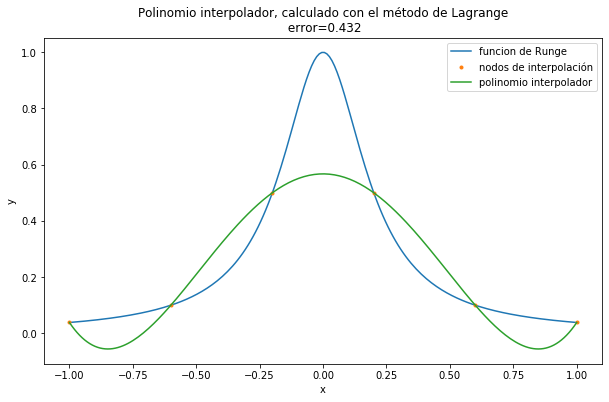

In [12]:
## Comparamos la función de Runge con el polinomio interpolador
# en unos cuantos puntos equiespaciados

def f(x):
    return 1/(1+25*x**2)

# Nodos de interpolación
n = 6
xs = np.linspace(-1,1,n)
ys = f(xs)

# Ahora evaluamos en un array de puntos, para dibujar el polinomio interpolador
x_eval = np.linspace(-1,1,200)
y_eval = lagrange(xs, ys, x_eval)

y_runge = f(x_eval)

plt.figure(figsize=(10,6))
plt.plot(x_eval, y_runge, label='funcion de Runge')
plt.plot(xs, ys, '.', label='nodos de interpolación')
plt.plot(x_eval, y_eval, label='polinomio interpolador')
plt.title('Polinomio interpolador, calculado con el método de Lagrange\n error=%.3f'% 
          np.max(np.abs(y_eval - y_runge)))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Ejercicio

- Calcula el máximo error que comete el polinomio interpolador en $N$ puntos equiespaciados del intervalo $[-1,1]$ al aproximar la función de Runge, para todos los valores de $N$ desde 1 hasta 20: ¿cómo se comporta el error?

_(Usa un bucle para almacenar los errores en un array, dibuja el error como función del número de puntos de interpolación)_

Sin embargo, es posible usar para interpolar coordenadas $x_i$ que no están equiespaciadas y que interpolan mucho mejor, tanto en teoría como en la práctica.

No entraremos en detalles, pero estos puntos (llamados __nodos de Chebyshev__) dan mucho mejor resultado que los nodos equiespaciados. Para el intervalo $[-1,1]$, esos nodos son:

$$
    x_k = \cos\left( \frac{(2k - 1) \pi}{2 N} \right ) \quad \text{for} \quad k=1, \ldots, N
$$

Observa que hay más nodos cerca de los extremos del intervalo que en el interior.

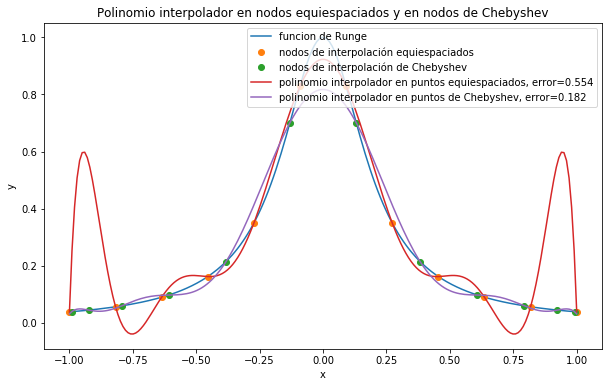

In [17]:
## Comparamos la función de Runge con el polinomio interpolador
# en unos cuantos puntos equiespaciados

def f(x):
    return 1/(1+25*x**2)

# Nodos de interpolación
n = 12
xs_equi = np.linspace(-1,1,n)
ys_equi = f(xs_equi)

xs_cheb = np.array([np.cos(((2*k-1)*np.pi)/(2*n)) for k in range(1,n+1)])
ys_cheb = f(xs_cheb)

# Ahora evaluamos en un array de puntos, para dibujar el polinomio interpolador
x_eval = np.linspace(-1,1,200)
y_lagrange_equi = lagrange(xs_equi, ys_equi, x_eval)
y_lagrange_cheb = lagrange(xs_cheb, ys_cheb, x_eval)
y_runge = f(x_eval)

plt.figure(figsize=(10,6))
plt.plot(x_eval, y_runge, label='funcion de Runge')
plt.plot(xs_equi, ys_equi, 'o', label='nodos de interpolación equiespaciados')
plt.plot(xs_cheb, ys_cheb, 'o', label='nodos de interpolación de Chebyshev')
plt.plot(x_eval, y_lagrange_equi, 
         label='polinomio interpolador en puntos equiespaciados, error=%.3f'%
                np.max(np.abs(y_lagrange_equi - y_runge)))
plt.plot(x_eval, y_lagrange_cheb, 
         label='polinomio interpolador en puntos de Chebyshev, error=%.3f'%
                np.max(np.abs(y_lagrange_cheb - y_runge)))
plt.title('Polinomio interpolador en nodos equiespaciados y en nodos de Chebyshev' )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Ejercicio

- Dibuja todos los polinomios de la base de Lagrange para 10 nodos de Chebyshev en el intervalo $[-1,1]$.
- Calcula el máximo error que comete el polinomio interpolador en $N$ nodos de Chebyshev del intervalo $[-1,1]$ al aproximar la función de Runge, para todos los valores de $N$ desde 1 hasta 20: ¿cómo se comporta el error?

## Otra forma de encontrar el polinomio interpolador

Buscamos el polinomio interpolador

$$
p(x) = a_0 + a_1\cdot x + \dots + a_n\cdot x^n
$$
que pasa por los $n+1$ puntos de interpolación
$$
p(x_0)=y_0,\:p(x_1)=y_1,\dots,p(x_n)=y_n.
$$
Desarrollando esta expresión, los coeficientes del polinomio interpolador son la solución del sistema de ecuaciones
$$
V\cdot \mathbf{a} = \mathbf{y},
$$
donde
$$
{\displaystyle V={\begin{bmatrix}1&x _{0}&x _{0}^{2}&\dots &x _{0}^{n}\\1&x _{1}&x _{1}^{2}&\dots &x _{1}^{n}\\1&x _{2}&x _{2}^{2}&\dots &x _{2}^{n}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x _{n}&x _{n}^{2}&\dots &x _{n}^{n}\end{bmatrix}}.}
$$
$$
{\displaystyle \mathbf{a}={\begin{bmatrix}a _{0}\\a_1\\\vdots\\a_n\end{bmatrix}};
\mathbf{y}={\begin{bmatrix}y_{0}\\y_1\\\vdots\\y_n\end{bmatrix}},}
$$


### Ejercicio

Construye la matriz anterior para una lista de puntos `xs`, y resuelve el sistema usando
```python
import scipy.linalg as la
# Resuelve A*x = b
la.solve(A, b) 
```


### Ejercicio

Compara el resultado con el polinomio interpolador obtenido con la base de Lagrange para algún ejemplo concreto.

## Diferencias divididas

Finalmente, hemos estudiado las diferencias divididas

$$
f[x_{\nu }]:=f(x_{{\nu }}),\qquad \nu \in \{0,\ldots ,k\}
$$

$$
f[x_{\nu },\ldots ,x_{{\nu +j}}]:={\frac  {f[x_{{\nu +1}},\ldots ,x_{{\nu +j}}]-f[x_{\nu },\ldots ,x_{{\nu +j-1}}]}{x_{{\nu +j}}-x_{\nu }}},\qquad \nu \in \{0,\ldots ,k-j\},\ j\in \{1,\ldots ,k\},
$$

que permiten construir el polinomio interpolador usando la fórmula de Newton.

### Ejercicio

Dadas dos listas de valores xs, ys (que contiene el resultado de evaluar f en cada puntos de xs), calcula las diferencias divididas del tipo 
$f[x_{\nu },\ldots ,x_{{\nu +j}}]$.

Es decir:
 - Si tienes $k$ puntos, crea un array M de dimensiones $k\times k$.
 - En la entrada $(i,j)$, si $i>j$, dejamos $M[i,j]=0$.
 - En la diagonal principal aparecen los valores $M[j,j]=f(x_j)=y_j$.
 - Sobre la diagonal $i<j$ aparecen diferencias divididas en puntos consecutivos:
$$
M[i,j] = f[x_i,x_{i+1},\dots,x_j]
$$

_(Para poder aplicar la fórmula recursiva anterior, es necesario rellenar las diagonales comenzando por la diagonal principal y hacia arriba...)_

### Ejercicio

 - Usa las diferencias divididas calculadas antes para obtener el polinomio interpolador en forma de Newton:

$$
P(x)=f[x_{0}]+f[x_{0},x_{1}](x-x_{0})+\cdots +f[x_{0},\ldots ,x_{k}](x-x_{0})(x-x_{1})\cdots (x-x_{{k-1}}).
$$

 - Compara el resultado con el polinomio obtenido con alguno de los métodos anteriores.
 - **extra** Evalúa el polinomio usando la evaluación anidada (método de Horner)
$$
P(x)=f[x_{0}] + (x-x_{0})\Big(
f[x_{0},x_{1}]+(x-x_{1})\big(
f[x_{0},x_{1},x_{2}] + 
\cdots +(x-x_{{k-1}})f[x_{0},\ldots ,x_{k}]
\big)\Big)
$$



Recordamos la interpretación de las diferencias divididas como derivadas (teorema del valor medio para las diferencias divididas)

$$
f[x_{0},\ldots ,x_{k}] = \frac{f^{k+1}(\xi)}{(k+1)!}
$$
para un punto $\xi$ del intervalo más pequeño que contiene a los nodos de interpolación $x_{0},\ldots ,x_{k}$.

Observa qué ocurre cuando dibujamos las diferencias divididas de orden $k$, para la función $f(x)=\sin(x)$: ¿qué forma tienen esas funciones?

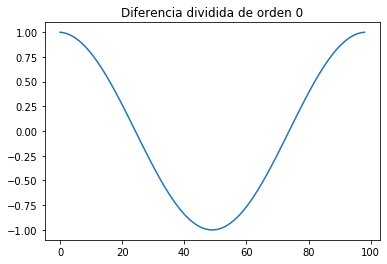

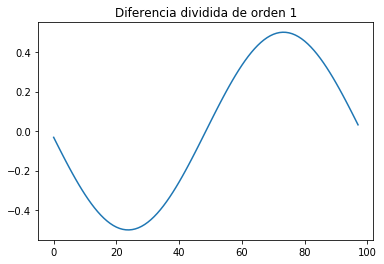

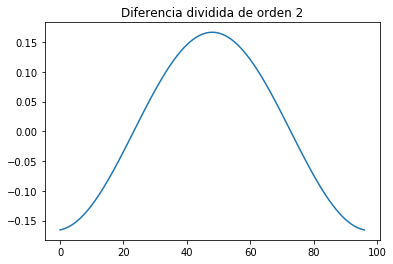

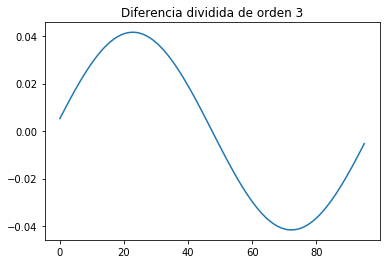

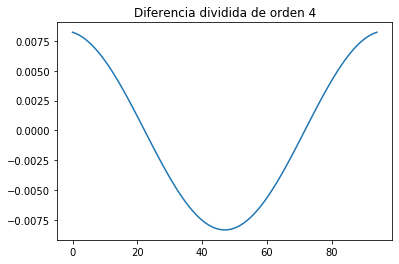

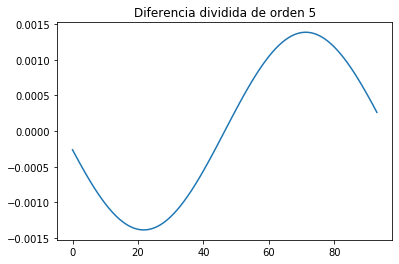

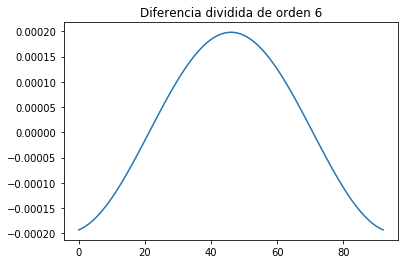

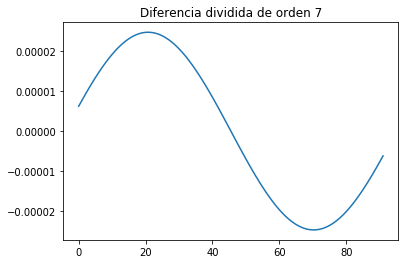

In [7]:
def f(x):
    return np.sin(x)

npoints = 100
xs = np.linspace(0, 2*np.pi, npoints)
difdivs = f(xs)
orden = 8
for k in range(orden):
    difdivs = np.array([(difdivs[j+1] - difdivs[j])/(xs[j+1+k] -xs[j]) for j in range(npoints-k-1)])
    plt.figure()
    plt.plot(difdivs)
    plt.title('Diferencia dividida de orden %d'%k)